## W3 Investigation

In [1]:
import corner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

import sys
sys.path.append("..")

from atm.models import STM, FRM, NEATM
from atm.obs import WISE
from atm import fit

# Additonal imports to make simulated data
from atm import Config
from atm.functions import calcPlanckLambda
from atm.functions import calcTss, calcQ
from atm.functions import interpFluxLambdaObs, interpFluxLambdaObsWithSunlight
from atm.functions import calcFluxLambdaObs, calcFluxLambdaObsWithSunlight
from atm.functions import calcFluxLambdaAtObs, calcFluxLambdaAtObsWithSunlight

In [2]:
m_to_mum = 1e6 # simple conversion from m to micron
km_to_m = 1e3 # conversion km to m

In [3]:
# Instantiate observatory and NEATM class for simulating data
obs = WISE()

In [4]:
plot_lambdas = np.linspace(3e-6, 25e-6, 100)
wise_central_lambdas = [3.368, 4.618, 12.082, 22.194]

In [5]:
planck_seds = []
planck_wise_fluxes = []
temps = [50, 100, 300, 500, 800]
for t in temps: 
    planck_seds.append(calcPlanckLambda(plot_lambdas, t))
    planck_wise_fluxes.append(obs.bandpassLambda(calcPlanckLambda, args=[t]))

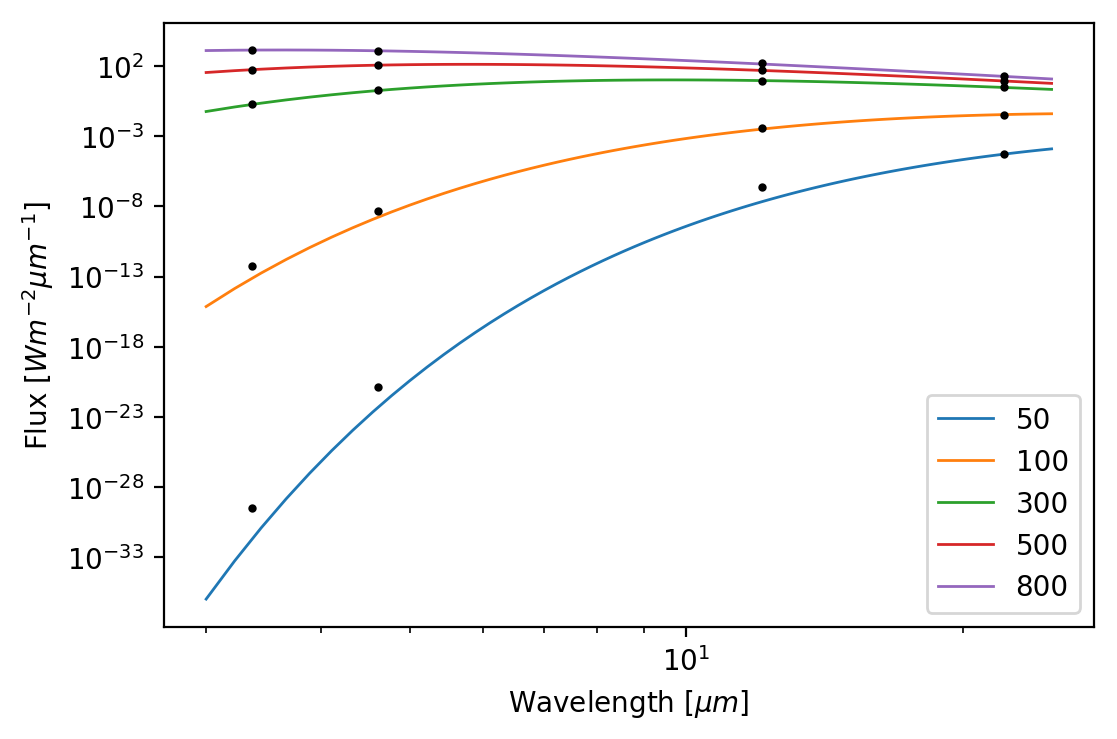

In [6]:
fig, ax = plt.subplots(1, 1, dpi=200)
for t, sed, flux in zip(temps, planck_seds, planck_wise_fluxes):
    ax.plot(m_to_mum * plot_lambdas, sed / m_to_mum, lw=1, label=t)
    ax.errorbar(wise_central_lambdas, flux  / m_to_mum, 
                fmt='o',
                c="k",
                ms=2)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Wavelength [$\mu m$]")
ax.set_ylabel("Flux [$W m^{-2} \mu m^{-1}$]")
ax.legend()

In [7]:
planck_seds = []
planck_wise_fluxes = []
temps = [100, 141, 200, 283, 400, 566, 800, 1131]
for t in temps: 
    planck_seds.append(calcPlanckLambda(np.array(wise_central_lambdas) * 1e-6, t))
    planck_wise_fluxes.append(obs.bandpassLambda(calcPlanckLambda, args=[t]))

print("Wise Quadrature Flux / Planck at Effective Wavelength Flux:")
for i, t in enumerate(temps):
    print("T: {} K; {}".format(t, planck_wise_fluxes[i] / planck_seds[i]))

Wise Quadrature Flux / Planck at Effective Wavelength Flux:
T: 100 K; [7.20232837 2.90899573 1.25794674 0.97252019]
T: 141 K; [2.9877205  1.62384531 0.87281524 0.98290211]
T: 200 K; [1.65954764 1.17498349 0.79851897 0.99908828]
T: 283 K; [1.18768756 1.02092626 0.85719641 1.01335007]
T: 400 K; [1.01845303 0.97756947 0.98139573 1.02397376]
T: 566 K; [0.97078719 0.97689432 1.12503365 1.03140162]
T: 800 K; [0.97280463 0.99049173 1.25479731 1.03643722]
T: 1131 K; [0.99181913 1.00596785 1.35794773 1.03985376]
